In [60]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from math import log
from matplotlib import cm
from sympy import symbols, diff
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example  -4 Data visualization with 3D charts


## Minimise $$ f(x,y) = \frac{1}{3{-x^2-y^2} + 1} $$
## Minimise $$ f(x,y) = \frac{1} {r+1}$$ where r is $3^{-x^2-y^2}$

In [27]:
def f(x,y):
    r=3**(-x**2-y**2)
    return 1/(r+1)

In [28]:
#Making our X & Y data
x_4 = np.linspace(start=-2,stop=2,num=200)
y_4 = np.linspace(start=-2,stop=2,num=200)
print ('Shape of x array',x_4.shape)
#x_4 and y_4 are now 1 Dimentional only, to be plotted in 3d chard they must be 2 Dimentional.
#for that,
x_4,y_4 = np.meshgrid(x_4,y_4)
print('Shape of x array after mesh', x_4.shape)

Shape of x array (200,)
Shape of x array after mesh (200, 200)


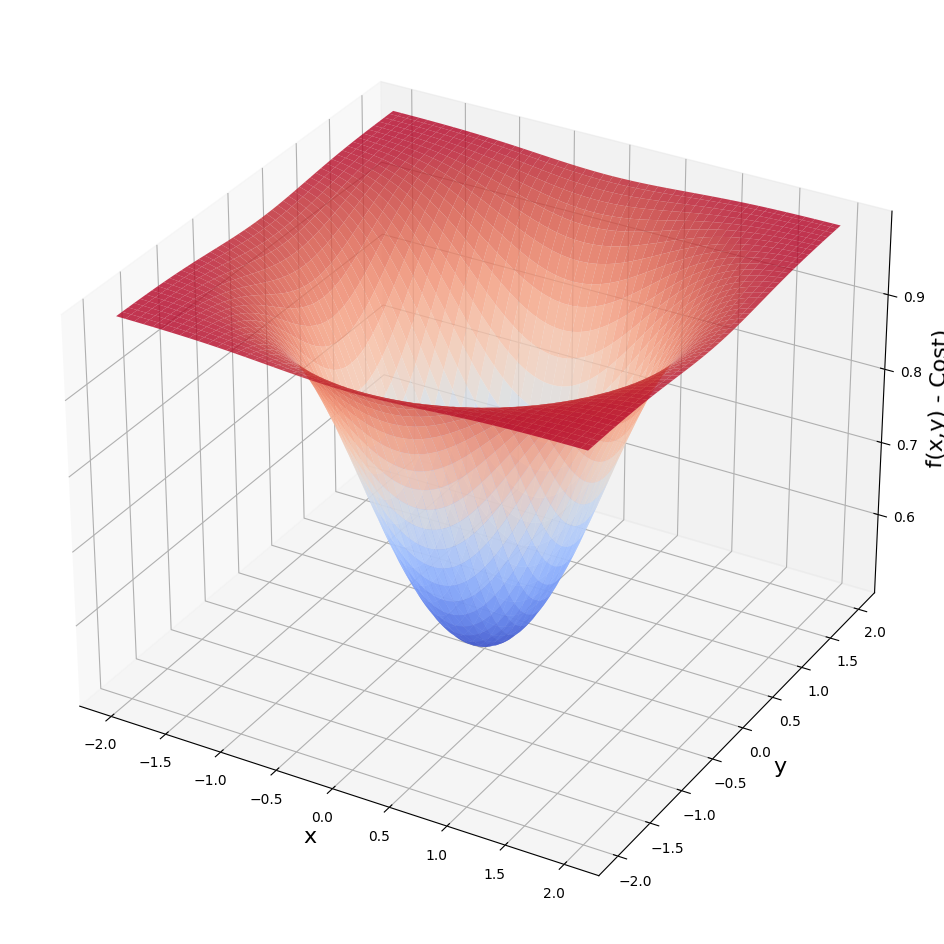

In [29]:
#Generating 3D plot
fig = plt.figure(figsize=[16,12])
# ax = Axes3D(fig)
ax = plt.axes(projection='3d')
ax.set_xlabel('x',fontsize=16)
ax.set_ylabel('y',fontsize=16)
ax.set_zlabel('f(x,y) - Cost)',fontsize=16)
ax.plot_surface(x_4,y_4,f(x_4,y_4), cmap = cm.coolwarm, alpha = 0.8)
plt.show()

# Partial Derivatives and Symbolic Computation

In [30]:
a,b= symbols('x,y')
#it means a stands for x, and b for y..

In [31]:
print (f(a,b))
#prints the equation wih the symbols 'x' and 'y'

1/(3**(-x**2 - y**2) + 1)


In [32]:
print (diff(f(a,b),a))
#prints the equation of the partial derivative with the symbols 'x' and 'y'

2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2


In [33]:
print(f(a,b).evalf(subs={a:1.8,b:1.0}))
#evalf - it evaluate and substitute x & y into our function.
#subs={a:1.8,b:1.0} , value of 'x' & 'y' at which you want to find the evaluate the cost
#a is the key, 1.8 is the value... A python dictionary, python gives both of a & b values at the same time
#Print the value of cost / f(x,y) at x=1.8 and y=1.0

0.990604794032582


In [34]:
print (diff(f(a,b),a).evalf(subs={a:1.8, b:1.0}))
#Print the value of partial derivative with respect to X.

0.0368089716197505


# Batch Gradient Descent with Sympy

In [35]:
#LET'S GOOOOO
multiplier = 0.1
max_iter = 400
params = np.array([1.8,1.0])
for n in range (max_iter):
    gradient_x = diff(f(a,b),a).evalf(subs={a:params[0],b:params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs={a:params[0],b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
print ('values in gradient array', gradients)
print ('minimum occurs at x value of :', params[0])
print ('minimum occurs at y value of :', params[1])
print ('the cost is:', f(params[0],params[1]))

values in gradient array [5.71287516047952e-9 3.17381953359973e-9]
minimum occurs at x value of : 9.82887861973314e-9
minimum occurs at y value of : 5.46048812207397e-9
the cost is: 0.500000000000000


# Batch Gradient Descent without Sympy
### Loops and Consideration of performance

# $$\frac{\partial f}{\partial x}$$

### For x,

# $$\frac{\partial f}{\partial x} = 2x\ln(3)*3^{-x^2-y^2}$$

### In case of ' * ' we can use \cdot , so we get ' . ' in the equation

# $$\frac{\partial f}{\partial x} = 2x\ln(3)\cdot3^{-x^2-y^2}$$

### For y,

# $$\frac{\partial f}{\partial y} = 2y\ln(3)*3^{-x^2-y^2}$$

In [36]:
#TO replace sympy, fisrt we make function fpx and fpy that we can use in place of   -diff(f(a,b),.........

def fpx(x,y):
    r=3**(-x**2-y**2)
    return 2*x*log(3)*r/(r+1)**2
def fpy(x,y):
    r=3**(-x**2-y**2)
    return 2*y*log(3)*r/(r+1)**2

In [37]:
multiplier = 0.1
max_iter = 400
params = np.array([1.8,1.0])
for n in range (max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
print ('values in gradient array', gradients)
print ('minimum occurs at x value of :', params[0])
print ('minimum occurs at y value of :', params[1])
print ('the cost is:', f(params[0],params[1]))
#This program runs 5x faster than the previous

values in gradient array [5.71287516e-09 3.17381953e-09]
minimum occurs at x value of : 9.828878619733109e-09
minimum occurs at y value of : 5.460488122073948e-09
the cost is: 0.5


# Graphing 3D Gradient Descent and Advanced Numpy Arrays

In [38]:
params = np.array([1.8,1.0])
values_array = params.reshape(1,2)
print (values_array.shape)
kirk = np.array([['captain', 'Guitar']])
print (kirk.shape)

(1, 2)
(1, 2)


In [39]:
hs_band = np.array([['Blackthought', 'MC'],['Questlove','MC']])
print (hs_band.shape)

(2, 2)


In [40]:
print ('hs_band[0]:', hs_band[0])
print ('hs_band[1][0]:',hs_band[1][0])

hs_band[0]: ['Blackthought' 'MC']
hs_band[1][0]: Questlove


In [41]:
the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots.shape)
print(the_roots)

(3, 2)
[['Blackthought' 'MC']
 ['Questlove' 'MC']
 ['captain' 'Guitar']]


In [42]:
print('Printing nicknames..', the_roots[:,0])

Printing nicknames.. ['Blackthought' 'Questlove' 'captain']


In [43]:
the_roots = np.append(arr=the_roots, values=[['malik','MC']],axis=0)
print('printing band roles', the_roots[:,1])

printing band roles ['MC' 'MC' 'Guitar' 'MC']


## Graphing 3D gradient descent with scatter points

values in gradient array [0.13086082 0.07270045]
minimum occurs at x value of : 0.22554260634177148
minimum occurs at y value of : 0.12530144796765078
the cost is: 0.518275488025232


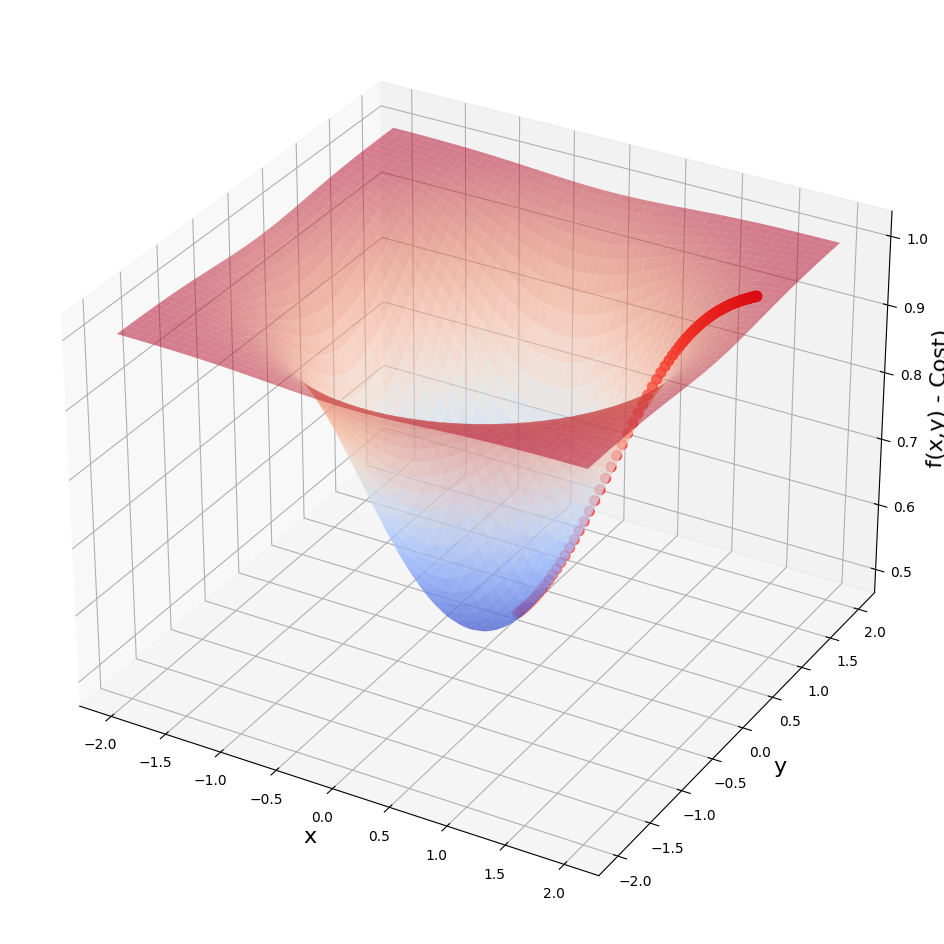

In [44]:
multiplier = 0.1
max_iter = 100
params = np.array([1.8,1.0])
for n in range (max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    values_array=np.append(arr= values_array, values=params.reshape(1,2), axis=0)
    #or
    #values_array=np.concatenate((values_array, params.reshape(1,2)), axis=0)
print ('values in gradient array', gradients)
print ('minimum occurs at x value of :', params[0])
print ('minimum occurs at y value of :', params[1])
print ('the cost is:', f(params[0],params[1]))

#Generating 3D plot
fig = plt.figure(figsize=[16,12])
# ax = Axes3D(fig)
x_val = values_array[:,0]
y_val = values_array[:,1]
z_val = f(values_array[:,0],values_array[:,1])
ax = plt.axes(projection='3d')
ax.set_xlabel('x',fontsize=16)
ax.set_ylabel('y',fontsize=16)
ax.set_zlabel('f(x,y) - Cost)',fontsize=16)
ax.plot_surface(x_4,y_4,f(x_4,y_4), cmap = cm.coolwarm, alpha = 0.5)
ax.scatter(x_val, y_val, z_val, s=50, color='red')
plt.show()

# Mean Squared Error

## Working with Data and a real cost function

## Mean squared Error: a cost funtion for regression problems

## $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2$$

## $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2$$

## $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2$$

## Transporting & Reshaping Arrays

In [45]:
#Making sample data
x_5 = np.array([0.1,1.2,2.4,3.2,4.1,5.7,6.5])
y_5 = np.array([1.7,2.4,3.5,3.0,6.1,9.4,8.2])
print('shape of x_5 array:', x_5.shape)
print('shape of y_5 array:', y_5.shape)
#it is only 1d, which doesn't work

shape of x_5 array: (7,)
shape of y_5 array: (7,)


In [46]:
#making x_5 and y_5 2d
x_5 = np.array([0.1,1.2,2.4,3.2,4.1,5.7,6.5]).reshape(7,1)
y_5 = np.array([1.7,2.4,3.5,3.0,6.1,9.4,8.2]).reshape(7,1)
#both reshape and transpose works but the traspose automatically works

In [47]:
regression = LinearRegression()
regression.fit(x_5,y_5)
print ('theta 0:', regression.intercept_[0])
print ('theta 1:', regression.coef_[0][0])

theta 0: 0.8475351486029554
theta 1: 1.222726463783591


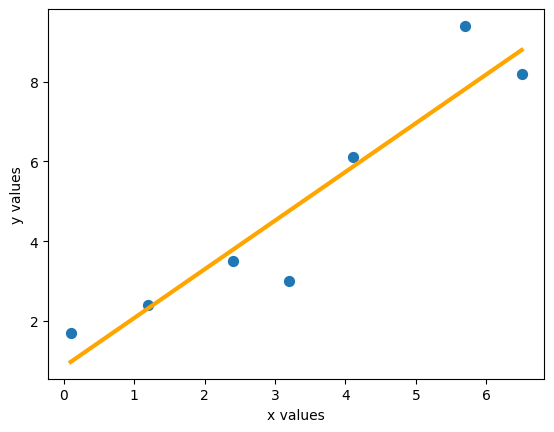

In [48]:
# plottting in the graph
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regression.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

### Implementing a MSE cost function

In [55]:
#y_hat = intercept + slope * x
#y_hat = theta0 + theta1 * x
y_hat = 0.8475351486029554 + 1.222726463783591 * x_5
print ('Estimated y-values (y_hat) \n', y_hat)
#comparing the y_hat and y values
print ('Incomparision, the real y-values \n', y_5)

Estimated y-values (y_hat) 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
Incomparision, the real y-values 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [58]:
# making a functiom to return MSE with y and y_hat
def mse(y,y_hat):
    #mse_calc = 1/7 * sum((y-y_hat)**2)
    #or
    #mse_calc = (1/y.size) * sum((y-y_hat)**2)
    #or
    mse_calc = np.average((y-y_hat)**2, axis=0)
    return mse_calc

In [59]:
print (mse(y_5,y_hat))

[0.94796558]


In [66]:
#we can also automatically calculate with the builtin function mean_squared_error from sklearn.metrics
print ('Manually calculating mse',mse(y_5,y_hat))
print ('mse regression using manual calc is: ',mean_squared_error(y_5,y_hat))
print ('mse regression with regr.predict is: ',mean_squared_error(y_5,regression.predict(x_5)))

Manually calculating mse [0.94796558]
mse regression using manual calc is:  0.9479655759794575
mse regression with regr.predict is:  0.9479655759794575
